# **Project - Recommendation Systems: Movie Recommendation System**

## **Marks: 40**
---------------
## **Context**
---------------

Online streaming platforms like **Netflix** have plenty of movies in their repository and if we can build a **Recommendation System** to recommend **relevant movies** to users, based on their **historical interactions**, this would **improve customer satisfaction** and hence, it will also improve the revenue of the platform. The techniques that we will learn here will not only be limited to movies, it can be any item for which you want to build a recommendation system.

-----------------
## **Objective**
-----------------

In this project we will be building various recommendation systems: 
- Knowledge/Rank based recommendation system
- Similarity-Based Collaborative filtering
- Matrix Factorization Based Collaborative Filtering

we are going to use the **ratings** dataset. 

-----------------
## **Dataset**
-----------------

The **ratings** dataset contains the following attributes: 
- userId
- movieId
- rating
- timestamp

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this case study.

Let's start by mounting the Google drive on Colab.

In [ ]:
# uncomment if you are using google colab

#from google.colab import drive
#drive.mount('/content/drive')

**Installing surprise library**

In [ ]:
# Installing surprise library, only do it for first time
!pip install surprise

## **Importing the necessary libraries and overview of the dataset**

In [59]:
# Used to ignore the warning given as output of the code
import warnings                                 
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt     

# Slightly advanced library for data visualization            
import seaborn as sns                           

# A dictionary output that does not raise a key error
from collections import defaultdict             

# A performance metrics in surprise
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For model tuning model hyper-parameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing cross validation
from surprise.model_selection import KFold

### **Loading the data**

In [60]:
# Import the dataset
rating = pd.read_csv('ratings.csv')
#rating = pd.read_csv('/content/drive/MyDrive/ratings.csv') # Uncomment this line code  and comment above line of code if you are using google colab.

Let's check the **info** of the data

In [61]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- There are **1,00,004 observations** and **4 columns** in the data
- All the columns are of **numeric data type**
- The data type of the timestamp column is int64 which is not correct. We can convert this to DateTime format but **we don't need timestamp for our analysis**. Hence, **we can drop this column**

In [62]:
# Dropping timestamp column
rating = rating.drop(['timestamp'], axis=1)

## **Question 1: Exploring the dataset (7 Marks)**

Let's explore the dataset and answer some basic data-related questions:

###**Q 1.1 Print the top 5 rows of the dataset (1 Mark)**

In [63]:
# Printing the top 5 rows of the dataset Hint: use .head()

# Remove _______and complete the code
rating.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


### **Q 1.2 Describe the distribution of ratings. (1 Mark)**



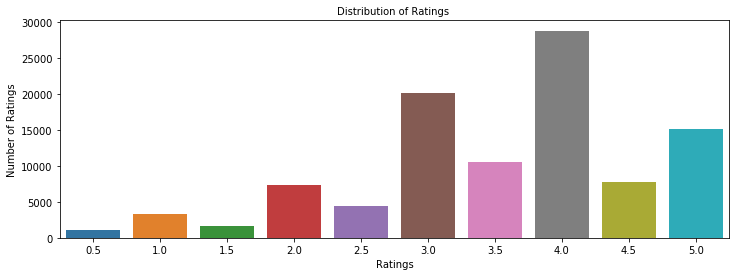

In [64]:
plt.figure(figsize = (12, 4))

# Remove _______and complete the code
sns.countplot(x = 'rating', data = rating)

plt.tick_params(labelsize = 10)
plt.title("Distribution of Ratings ", fontsize = 10)
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("Number of Ratings", fontsize = 10)
plt.show()

**Write your Answer here:______**

The distribution of ratings can be described as follows:

* There are 10 possible rating values: 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, and 5.
* The highest-rated value is 4, with approximately 29,900 number of ratings.
* The second highest-rated value is 3, with around 20,100 number of ratings.
* The third highest-rated value is 5, with approximately 14,000 number of ratings.
* The lowest-rated value is 0.5, with around 1,000 number of ratings.
* The second lowest-rated value is 1.5, with approximately 1,500 number of ratings.
* The third lowest-rated value is 1, with around 4,000 number of ratings.
* The remaining rating values fall within the range of 5,000 to 10,000 number of ratings.


### **Q 1.3 What is the total number of unique users and unique movies? (1 Mark)**


In [65]:
# Finding number of unique users
#remove _______ and complete the code
rating['userId'].nunique()

671

**Write your answer here:______**
The total number of unique users are 671.

In [66]:
# Finding number of unique movies
# Remove _______ and complete the code

rating['movieId'].nunique()

9066

**Write your answer here:______**
The total number of unique movies are 9066.

### **Q 1.4 Is there a movie in which the same user interacted with it more than once? (1 Mark)**

In [67]:
rating.groupby(['userId', 'movieId']).count()

rating
userId movieId        
1      31            1
       1029          1
       1061          1
       1129          1
       1172          1
...                ...
671    6268          1
       6269          1
       6365          1
       6385          1
       6565          1

[100004 rows x 1 columns]

In [68]:
rating.groupby(['userId', 'movieId']).count()['rating'].sum()

100004

**Write your Answer here:__________**
Yes, there is 100004 movies that the same user interacted with it more than once.

### **Q 1.5 Which is the most interacted movie in the dataset? (1 Mark)**

In [69]:
# Remove _______ and complete the code
rating['movieId'].value_counts().idxmax()

356

**Write your Answer here:______**
The most interacted movie in the dataset in movieID = 356

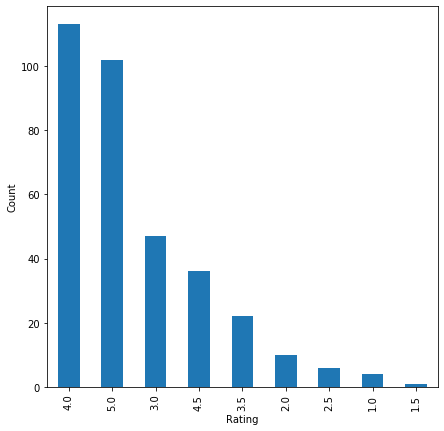

In [70]:
# Plotting distributions of ratings for 341 interactions with movieid 356 
plt.figure(figsize=(7,7))

rating[rating['movieId'] == 356]['rating'].value_counts().plot(kind='bar')

plt.xlabel('Rating')

plt.ylabel('Count')

plt.show()

**Write your Answer here:______**

The distribution of ratings for the movie with ID 356 can be described as follows:

* The highest-rated value is 4, with a count of approximately 160.
* The second highest-rated value is 5, with a count of around 108.
* The lowest-rated value is 0.5, with a count of 0.
* The second lowest-rated value is 1.5, with a count of 1.

### **Q 1.6 Which user interacted the most with any movie in the dataset? (1 Mark)**

In [71]:
# Remove _______ and complete the code
rating['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

**Write your Answer here:_______**
The  user that interacted the most with any movie in the dataset is userId = 547

### **Q 1.7 What is the distribution of the user-movie interactions in this dataset? (1 Mark)**

In [72]:
# Finding user-movie interactions distribution
count_interactions = rating.groupby('userId').count()['movieId']
count_interactions

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: movieId, Length: 671, dtype: int64

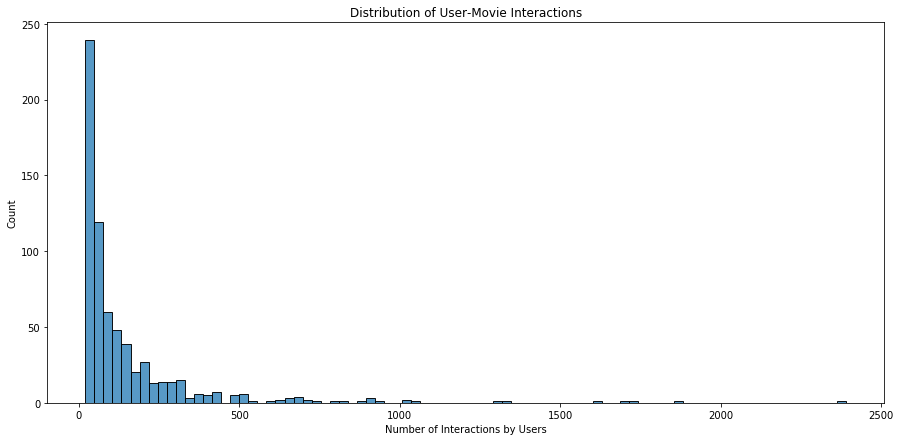

In [73]:
# Plotting user-movie interactions distribution

plt.figure(figsize=(15,7))
# Remove _______ and complete the code

sns.histplot(count_interactions)

plt.xlabel('Number of Interactions by Users')
plt.ylabel('Count')
plt.title('Distribution of User-Movie Interactions')

plt.show()

**Write your Answer here:__________**

the distribution is right-skewed, meaning it has a longer tail towards larger interaction counts. The majority of users have around 20 interactions, with a concentration of approximately 240 users. The range of interaction counts spans from 20 to 500 interactions by users.

#### As we have now explored the data, let's start building Recommendation systems

## **Question 2: Create Rank-Based Recommendation System (3 Marks)**

### **Model 1: Rank-Based Recommendation System**

Rank-based recommendation systems provide recommendations based on the most popular items. This kind of recommendation system is useful when we have **cold start** problems. Cold start refers to the issue when we get a new user into the system and the machine is not able to recommend movies to the new user, as the user did not have any historical interactions in the dataset. In those cases, we can use rank-based recommendation system to recommend movies to the new user.

To build the rank-based recommendation system, we take **average** of all the ratings provided to each movie and then rank them based on their average rating.

In [74]:
# Remove _______ and complete the code

# Calculating average ratings
average_rating = rating.groupby('movieId').mean()['rating']

# Calculating the count of ratings
count_rating = rating.groupby('movieId').count()['rating']

# Making a dataframe with the count and average of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

In [75]:
final_rating.head()

,avg_rating,rating_count
movieId,,
1,3.872470,247
2,3.401869,107
3,3.161017,59
4,2.384615,13
5,3.267857,56


Now, let's create a function to find the **top n movies** for a recommendation based on the average ratings of movies. We can also add a **threshold for a minimum number of interactions** for a movie to be considered for recommendation. 

In [76]:
def top_n_movies(data, n, min_interaction=100):
    
    #Finding movies with minimum number of interactions
    recommendations = data[data['rating_count'] >= min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values(by='avg_rating', ascending=False)
    
    return recommendations.index[:n]

We can **use this function with different n's and minimum interactions** to get movies to recommend

#### **Recommending top 5 movies with 50 minimum interactions based on popularity**

In [77]:
# Remove _______ and complete the code
list(top_n_movies(final_rating, 5, 50))

[858, 318, 969, 913, 1221]

#### **Recommending top 5 movies with 100 minimum interactions based on popularity**

In [78]:
# Remove _______ and complete the code
list(top_n_movies(final_rating, 5, 100))

[858, 318, 1221, 50, 527]

#### **Recommending top 5 movies with 200 minimum interactions based on popularity**

In [79]:
# Remove _______ and complete the code
list(top_n_movies(final_rating, 5, 200))

[858, 318, 50, 527, 608]

Now that we have seen **how to apply the Rank-Based Recommendation System**, let's apply the **Collaborative Filtering Based Recommendation Systems**.

## **Model 2: User based Collaborative Filtering Recommendation System (7 Marks)**

![collaborative_filtering.PNG](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/collaborative_filtering.PNG)

In the above **interactions matrix**, out of users B and C, which user is most likely to interact with the movie, "The Terminal"?

In this type of recommendation system, `we do not need any information` about the users or items. We only need user item interaction data to build a collaborative recommendation system. For example - 
<ol>
    <li><b>Ratings</b> provided by users. For example - ratings of books on goodread, movie ratings on imdb etc</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos</li>
    <li><b>Use/buying</b> of a product by users. For example - buying different items on e-commerce sites</li>
    <li><b>Reading</b> of articles by readers on various blogs</li>
</ol>

**Types of Collaborative Filtering**

- Similarity/Neighborhood based

 * User-User Similarity Based  
 * Item-Item similarity based

- Model based

#### **Building Similarity/Neighborhood based Collaborative Filtering**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/cosine.PNG)

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`**. Finally splitting the data into train and test set.

#### **Making the dataset into surprise dataset and splitting it into train and test set**

In [80]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#### **Build the first baseline similarity based recommendation system using cosine similarity and KNN**

In [81]:
%%time
# Remove _______ and complete the code

# Defining Nearest neighbour algorithm
algo_knn_user = KNNBasic()

# Train the algorithm on the trainset or fitting the model on train dataset 
algo_knn_user.fit(trainset)

# Predict ratings for the testset
predictions = algo_knn_user.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9672
Wall time: 4.07 s


0.9671524784958385

### **Q 3.1 What is the RMSE for baseline user based collaborative filtering recommendation system? (1 Mark)**

**Write your Answer here:______**

The RMSE is 0.9672.

### **Q 3.2 What is the Predicted  rating for an user with userId=4 and for movieId=10 and movieId=3? (1 Mark)**

Let's us now predict rating for an user with `userId=4` and for `movieId=10`

In [82]:
# Remove _______ and complete the code
algo_knn_user.predict(4, 10, r_ui = 4, verbose = True)

user: 4          item: 10         r_ui = 4.00   est = 3.68   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.680292946370331, details={'actual_k': 40, 'was_impossible': False})

**Write your Answer here:_______**

The predicted rating for user with userId=4 and movieId=10 is 3.68.

Let's predict the rating for the same `userId=4` but for a movie which this user has not interacted before i.e. `movieId=3`

In [83]:
# Remove _______ and complete the code
algo_knn_user.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 3.31   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.3125531823311247, details={'actual_k': 40, 'was_impossible': False})

**Write your Answer here:______**

The predicted rating for user with userId=4 and movieId=3 is 3.31.

### **Improving user-user similarity based recommendation system by tuning its hyper-parameters**

Below we will be tuning hyper-parmeters for the `KNNBasic` algorithms. Let's try to understand different hyperparameters of KNNBasic algorithm - 

- **k** (int) – The (max) number of neighbors to take into account for aggregation (see this note). Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - pearson
    - pearson baseline
    
For more details please refer the official documentation https://surprise.readthedocs.io/en/stable/knn_inspired.html

### **Q 3.3 Perform hyperparameter tuning for the baseline user based collaborative filtering recommendation system and find the RMSE for tuned user based collaborative filtering recommendation system? (3 Marks)**

In [84]:
# Remove _______ and complete the code

# Setting up parameter grid to tune the hyperparameters
param_grid = {}

# Performing 3-fold cross validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
grid_obj.fit(data)

# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

0.97895466329754
{}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters** as shown above.

Below we are analysing evaluation metrics - RMSE and MAE at each and every split to analyze the impact of each value of hyperparameters

In [85]:
results_df = pd.DataFrame.from_dict(grid_obj.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params
0,0.971267,0.981699,0.983897,0.978955,0.005509,1,0.748286,0.754103,0.755622,0.75267,0.003162,1,0.284428,0.083215,5.294744,1.317877,{}


Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.



In [86]:
%%time
# Remove _______ and complete the code

# Using the optimal similarity measure for user-user based collaborative filtering
# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized_user = KNNBasic(k=30, min_k=5, sim_options={'name': 'pearson_baseline', 'user_based': True},verbose=False)

# Training the algorithm on the trainset
similarity_algo_optimized_user.fit(trainset)

# Predicting ratings for the testset
predictions = similarity_algo_optimized_user.test(testset)

# Computing RMSE on testset
accuracy.rmse(predictions)

RMSE: 0.9857
Wall time: 5.59 s


0.985682893966352

**Write your Answer here:__________**

The RMSE is: 0.9857

### **Q 3.4 What is the Predicted rating for an user with userId =4 and for movieId= 10 and movieId=3 using tuned user based collaborative filtering? (1 Mark)**

Let's us now predict rating for an user with `userId=4` and for `movieId=10` with the optimized model

In [87]:
# Remove _______ and complete the code
similarity_algo_optimized_user.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 3.63   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.6252072082489737, details={'actual_k': 30, 'was_impossible': False})

**Write your Answer here:______**

The predicted rating for user with userId=4 and movieId=10 is 3.63.

Below we are predicting rating for the same `userId=4` but for a movie which this user has not interacted before i.e. `movieId=3`, by using the optimized model as shown below - 

In [88]:
# Remove _______ and complete the code
similarity_algo_optimized_user.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 2.61   {'actual_k': 29, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=2.607144390372331, details={'actual_k': 29, 'was_impossible': False})

**Write your Answer here:______**

The predicted rating for user with userId=4 and movieId=3 is 2.61.

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out the similar users to a given user or its nearest neighbors based on this KNNBasic algorithm. Below we are finding 5 most similar user to the `userId=4` based on the `msd` distance metric

In [89]:
similarity_algo_optimized_user.get_neighbors(4, k=5)

[128, 46, 157, 9, 211]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are - 

- data: a rating dataset
- user_id: an user id against which we want the recommendations
- top_n: the number of movies we want to recommend
- algo: the algorithm we want to use to predict the ratings

In [90]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended movie ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='userId', columns='movieId', values='rating')
    
    # Extracting those movie ids which the user_id has not interacted yet
    non_interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the movie id which user_id has not interacted yet
    for item_id in non_interacted_movies:
        
        # Predicting the ratings for those non interacted movie ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating movies for this user

#### **Predicted top 5 movies for userId=4 with similarity based recommendation system**

In [91]:
#remove _______ and complete the code
recommendations = get_recommendations(rating, 4, 5, similarity_algo_optimized_user)

### **Q 3.5 Predict the top 5 movies for userId=4 with similarity based recommendation system (1 Mark)**

In [92]:
recommendations

[(1354, 4.759122449332142),
 (27721, 4.736251594443842),
 (3359, 4.715509865860775),
 (1260, 4.707492136381555),
 (1245, 4.692130794668242)]

## **Model 3: Item based Collaborative Filtering Recommendation System (7 Marks)**

In [93]:
# Remove _______ and complete the code

# Definfing similarity measure
sim_options = {'name': 'cosine', 'user_based': False}

# Defining Nearest neighbour algorithm
algo_knn_item = KNNBasic(k=40, min_k=5, sim_options=sim_options,verbose=False)

# Train the algorithm on the trainset or fitting the model on train dataset 
algo_knn_item.fit(trainset)

# Predict ratings for the testset
predictions = algo_knn_item.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0033


1.0033177888964782

### **Q 4.1 What is the RMSE for baseline item based collaborative filtering recommendation system ?(1 Mark)**

**Write your Answer here:__________**

The RMSE is: 1.

Let's us now predict rating for an user with `userId=4` and for `movieId=10`

### **Q 4.2 What is the Predicted  rating for an user with userId =4 and for movieId= 10 and movieId=3? (1 Mark)**

In [94]:
# Remove _______ and complete the code
algo_knn_item.predict(4 , 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 4.37   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=4.373794871885004, details={'actual_k': 40, 'was_impossible': False})

**Write your Answer here:__________**

The predicted rating for user with userId=4 and movieId=10 is 4.37.

Let's predict  the rating for the same `userId=4` but for a movie which this user has not interacted before i.e. `movieId=3`

In [95]:
# Remove _______ and complete the code
algo_knn_item.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 4.07   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=4.071601862880049, details={'actual_k': 40, 'was_impossible': False})

**Write your Answer here:__________**

The predicted rating for user with userId=4 and movieId=3 is 4.07.

### **Q 4.3 Perform hyperparameter tuning for the baseline item based collaborative filtering recommendation system and find the RMSE for tuned item based collaborative filtering recommendation system? (3 Marks)**

In [98]:
# Remove _______ and complete the code

# Setting up parameter grid to tune the hyperparameters
# param_grid = {'k': [20, 30, 40, 50], 'min_k': [1, 3, 5], 'sim_options': {'name': ['cosine', 'pearson_baseline'], 'user_based': [False]}}
# MemoryError: Unable to allocate 464. MiB for an array with shape (7800, 7800) and data type float64
param_grid = {}


# Performing 3-fold cross validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
grid_obj.fit(data)

# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

0.9801638581249502
{}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above**

Below we are analysing evaluation metrics - RMSE and MAE at each and every split to analyze the impact of each value of hyperparameters

In [99]:
results_df = pd.DataFrame.from_dict(grid_obj.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params
0,0.978412,0.983228,0.978852,0.980164,0.002174,1,0.753767,0.756122,0.752331,0.754073,0.001563,1,0.103332,0.001699,1.428012,0.070499,{}


Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

In [100]:
# Remove _______ and complete the code
# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized_item = KNNBasic(sim_options=sim_options, k=40, min_k=1, verbose=False)

# Training the algorithm on the trainset
similarity_algo_optimized_item.fit(trainset)

# Predicting ratings for the testset
predictions = similarity_algo_optimized_item.test(testset)

# Computing RMSE on testset
accuracy.rmse(predictions)

RMSE: 1.0032


1.003221450633729

**Write your Answer here:__________**

The RMSE is: 1.

### **Q 4.4 What is the Predicted rating for an item with userId =4 and for movieId= 10 and movieId=3 using tuned item based collaborative filtering? (1 Mark)**

Let's us now predict rating for an user with `userId=4` and for `movieId=10` with the optimized model as shown below

In [101]:
# Remove _______ and complete the code
similarity_algo_optimized_item.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 4.37   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=4.373794871885004, details={'actual_k': 40, 'was_impossible': False})

**Write your Answer here:___________**

The predicted rating for user with userId=4 and movieId=10 is 4.37.

Let's predict the rating for the same `userId=4` but for a movie which this user has not interacted before i.e. `movieId=3`, by using the optimized model:

In [102]:
# Remove _______ and complete the code
similarity_algo_optimized_item.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 4.07   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=4.071601862880049, details={'actual_k': 40, 'was_impossible': False})

**Write your Answer here:________**

The predicted rating for user with userId=4 and movieId=3 is 4.07.

### **Identifying similar items to a given item (nearest neighbors)**
We can also find out the similar items to a given item or its nearest neighbors based on this KNNBasic algorithm. Below we are finding 5 most similar items to the `movieId=3` based on the `msd` distance metric

In [103]:
# Remove _______ and complete the code
similarity_algo_optimized_item.get_neighbors(4, k=5)

[11, 19, 27, 29, 36]

#### **Predicted top 5 movies for userId=4 with similarity based recommendation system**

In [104]:
# Remove _______ and complete the code
recommendations = get_recommendations(rating, 4, 5, similarity_algo_optimized_item)

### **Q 4.5 Predict the top 5 movies for userId=4 with similarity based recommendation system (1 Mark)**

In [105]:
recommendations

[(84, 5), (1040, 5), (1067, 5), (2481, 5), (2562, 5)]

## **Model 4: Based Collaborative Filtering - Matrix Factorization using SVD (7 Marks)**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

**Latent Features:** The features that are not present in the empirical data but can be inferred from the data. For example:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF3.PNG)

Now if we notice the above movies closely:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF4.PNG)

Here **Action**, **Romance**, **Suspense** and **Comedy** are latent features of the corresponding movies. Similarly, we can compute the latent features for users as shown below:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF5.PNG)



### **Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

First we need to convert the below movie-rating dataset:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF3.PNG)

into an user-item matrix as shown below:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF6.PNG)

We have already done this above while computing cosine similarities.

**SVD decomposes this above matrix into three separate matrices:**
- U matrix
- Sigma matrix
- V transpose matrix

#### **U-matrix**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF7.PNG)

the above matrix is a n x k matrix, where:
- n is number of users
- k is number of latent features

#### **Sigma-matrix**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF8.PNG)

the above matrix is a k x k matrix, where:
- k is number of latent features
- Each diagonal entry is the singular value of the original interaction matrix

#### **V-transpose matrix**

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/CF9.PNG)

the above matrix is a kxn matrix, where:
- k is the number of latent features
- n is the number of items

### **Build a baseline matrix factorization recommendation system**

In [106]:
# Remove _______ and complete the code

# Using SVD matrix factorization
algo_svd = SVD()

# Training the algorithm on the trainset
algo_svd.fit(trainset)

# Predicting ratings for the testset
predictions = algo_svd.test(testset)

# Computing RMSE on the testset
accuracy.rmse(predictions)

RMSE: 0.9025


0.9024870438573577

### **Q 5.1 What is the RMSE for baseline SVD based collaborative filtering recommendation system? (1 Mark)**

**Write your Answer here:___________**

The RMSE is: 0.9025

### **Q 5.2 What is the Predicted  rating for an user with userId =4 and for movieId= 10 and movieId=3? (1 Mark)**

Let's us now predict rating for an user with `userId=4` and for `movieId=10`

In [107]:
# Remove _______ and complete the code
algo_svd.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 4.02   {'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=4.015005479535583, details={'was_impossible': False})

**Write your Answer here:______**

The predicted rating for user with userId=4 and movieId=10 is 4.00.

Let's predict the rating for the same `userId=4` but for a movie which this user has not interacted before i.e. `movieId=3`:

In [108]:
# Remove _______ and complete the code
algo_svd.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 3.86   {'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.863332699836134, details={'was_impossible': False})

**Write your Answer here:_____**

The predicted rating for user with userId=4 and movieId=3 is 3.86.

### **Improving matrix factorization based recommendation system by tuning its hyper-parameters**

In SVD, rating is predicted as - 

$$\hat{r}_{u i}=\mu+b_{u}+b_{i}+q_{i}^{T} p_{u}$$

If user $u$ is unknown, then the bias $b_{u}$ and the factors $p_{u}$ are assumed to be zero. The same applies for item $i$ with $b_{i}$ and $q_{i}$.

To estimate all the unknown, we minimize the following regularized squared error:

$$\sum_{r_{u i} \in R_{\text {train }}}\left(r_{u i}-\hat{r}_{u i}\right)^{2}+\lambda\left(b_{i}^{2}+b_{u}^{2}+\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)$$

The minimization is performed by a very straightforward **stochastic gradient descent**:

$$\begin{aligned} b_{u} & \leftarrow b_{u}+\gamma\left(e_{u i}-\lambda b_{u}\right) \\ b_{i} & \leftarrow b_{i}+\gamma\left(e_{u i}-\lambda b_{i}\right) \\ p_{u} & \leftarrow p_{u}+\gamma\left(e_{u i} \cdot q_{i}-\lambda p_{u}\right) \\ q_{i} & \leftarrow q_{i}+\gamma\left(e_{u i} \cdot p_{u}-\lambda q_{i}\right) \end{aligned}$$

There are many hyperparameters to tune in this algorithm, you can find a full list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)

Below we will be tuning only three hyperparameters -
- **n_epochs**: The number of iteration of the SGD algorithm
- **lr_all**: The learning rate for all parameters
- **reg_all**: The regularization term for all parameters

### **Q 5.3 Perform hyperparameter tuning for the baseline SVD based collaborative filtering recommendation system and find the RMSE for tuned SVD based collaborative filtering recommendation system? (3 Marks)**

In [109]:
# Remove _______ and complete the code

# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8938270365955302
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


Once the **grid search** is complete, we can get the **optimal values** for each of those hyperparameters, as shown above.

Below we are analysing evaluation metrics - RMSE and MAE at each and every split to analyze the impact of each value of hyperparameters

In [110]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_epochs,param_lr_all,param_reg_all
0,0.942638,0.939055,0.946934,0.942876,0.003221,25,0.737863,0.734526,0.742152,0.738180,0.003121,25,1.859011,0.076755,0.241988,0.006668,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}",10,0.001,0.2
1,0.947059,0.944025,0.951802,0.947628,0.003200,26,0.743079,0.739677,0.747411,0.743389,0.003165,26,1.737667,0.026132,0.246000,0.004967,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.4}",10,0.001,0.4
2,0.951842,0.949095,0.957301,0.952746,0.003410,27,0.748676,0.745315,0.752901,0.748964,0.003104,27,1.734309,0.012540,0.250998,0.005355,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.6}",10,0.001,0.6
3,0.907526,0.902510,0.910571,0.906869,0.003323,11,0.702110,0.698827,0.706992,0.702643,0.003355,9,1.694640,0.036425,0.213347,0.016734,"{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2}",10,0.005,0.2
4,0.913849,0.909643,0.918217,0.913903,0.003501,15,0.709839,0.706388,0.714619,0.710282,0.003375,15,1.693333,0.020501,0.216358,0.045825,"{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}",10,0.005,0.4


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [111]:
# Remove _______ and complete the code

# Building the optimized SVD model using optimal hyperparameter search
svd_algo_optimized = SVD(n_epochs=30, lr_all=0.2, reg_all=1)

# Training the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Predicting ratings for the testset
predictions = svd_algo_optimized.test(testset)

# Computing RMSE
accuracy.rmse(predictions)

RMSE: 0.9962


0.9961909162410686

### **Q 5.4 What is the Predicted rating for an user with userId =4 and for movieId= 10 and movieId=3 using SVD based collaborative filtering? (1 Mark)**

Let's us now predict rating for an user with `userId=4` and for `movieId=10` with the optimized model

In [112]:
# Remove _______ and complete the code
svd_algo_optimized.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 4.19   {'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=4.19205700118154, details={'was_impossible': False})

**Write your Answer here:_________**

 The predicted rating for user with userId=4 and movieId=10 is 4.19.

Let's predict the rating for the same `userId=4` but for a movie which this user has not interacted before i.e. `movieId=3`:

In [113]:
# Remove _______ and complete the code
svd_algo_optimized.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 4.06   {'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=4.0606103805101315, details={'was_impossible': False})

### **Q 5.5 Predict the top 5 movies for userId=4 with SVD based recommendation system?(1 Mark)**

In [114]:
# Remove _______ and complete the code
get_recommendations(rating, 4, 5, svd_algo_optimized)

[(1819, 5), (2880, 5), (3202, 5), (3320, 5), (3854, 5)]

### **Predicting ratings for already interacted movies** 

Below we are comparing the rating predictions of users for those movies which has been already watched by an user. This will help us to understand how well are predictions are as compared to the actual ratings provided by users

In [115]:
def predict_already_interacted_ratings(data, user_id, algo):
    
    # Creating an empty list to store the recommended movie ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='userId', columns='movieId', values='rating')
    
    # Extracting those movie ids which the user_id has interacted already
    interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].notnull()].index.tolist()
    
    # Looping through each of the movie id which user_id has interacted already
    for item_id in interacted_movies:
        
        # Extracting actual ratings
        actual_rating = user_item_interactions_matrix.loc[user_id, item_id]
        
        # Predicting the ratings for those non interacted movie ids by this user
        predicted_rating = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, actual_rating, predicted_rating))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return pd.DataFrame(recommendations, columns=['movieId', 'actual_rating', 'predicted_rating']) # returing top n highest predicted rating movies for this user

Here we are comparing the predicted ratings by `similarity based recommendation` system against actual ratings for `userId=7`

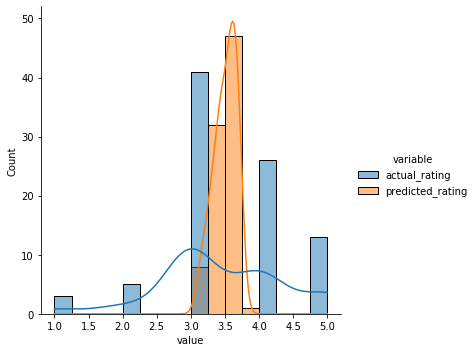

In [116]:
predicted_ratings_for_interacted_movies = predict_already_interacted_ratings(rating, 7, similarity_algo_optimized_item)
df = predicted_ratings_for_interacted_movies.melt(id_vars='movieId', value_vars=['actual_rating', 'predicted_rating'])
sns.displot(data=df, x='value', hue='variable', kde=True);

**Write your Answer here:__________**

The graph shows the comparison between predicted ratings and actual ratings for movies that have been watched by user with userId=7. The x-axis represents the rating values, while the y-axis represents the count of ratings.

From the graph, we can observe the following:

1. Predicted Ratings Distribution: The predicted ratings follow a normal distribution ranging from 3 to 4. The peak of the distribution is around 3.5, indicated by the highest count of approximately 48. This suggests that the majority of predicted ratings for the watched movies by user 7 are centered around 3.5.


2. Actual Ratings Distribution: The actual ratings provided by user 7 for the watched movies are spread across the rating values of 1, 2, 3, 4, and 5. The highest count is observed at the rating value of 3, with approximately 41 occurrences. This indicates that user 7 has given more ratings around 3 for the movies they have watched.

By comparing the predicted ratings to the actual ratings, we can assess the performance of the similarity-based recommendation system for user 7. The graph provides insights into the distribution of predicted and actual ratings, allowing us to understand how well the system's predictions align with the user's actual preferences.

Below we are comparing the predicted ratings by `matrix factorization based recommendation` system against actual ratings for `userId=7`

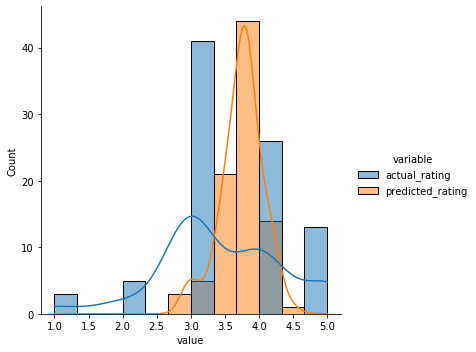

In [117]:
predicted_ratings_for_interacted_movies = predict_already_interacted_ratings(rating, 7, svd_algo_optimized)
df = predicted_ratings_for_interacted_movies.melt(id_vars='movieId', value_vars=['actual_rating', 'predicted_rating'])
sns.displot(data=df, x='value', hue='variable', kde=True);

In [118]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

## **Precision and Recall @ k**

RMSE is not the only metric we can use here. We can also examine two fundamental measures, precision and recall. We also add a parameter k which is helpful in understanding problems with multiple rating outputs.

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. Value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  

**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**Recall** - It is the **fraction of actually relevant items that are recommended to the user** i.e. if out of 10 relevant movies, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision** - It is the **fraction of recommended items that are relevant actually** i.e. if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

See the Precision and Recall @ k section of your notebook and follow the instructions to compute various precision/recall values at various values of k.

To know more about precision recall in Recommendation systems refer to these links : 

https://surprise.readthedocs.io/en/stable/FAQ.html

https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54

### **Question6: Compute the precision and recall, for each of the 6 models, at k = 5 and 10. This is 6 x 2 = 12 numerical values? (4 marks)**

In [119]:
# Function can be found on surprise documentation FAQs
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls



In [124]:
# A basic cross-validation iterator.
kf = KFold(n_splits=5)

# Make list of k values
K = [5, 10]

# Remove _______ and complete the code
# Make list of models
models = [algo_knn_user, similarity_algo_optimized_user, algo_knn_item, similarity_algo_optimized_item, svd_algo_optimized]

for k in K:
    for model in models:
        print('> k={}, model={}'.format(k,model.__class__.__name__))
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('-----> Precision: ', round(sum(p) / len(p), 3))
        print('-----> Recall: ', round(sum(r) / len(r), 3))

> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
-----> Precision:  0.773
-----> Recall:  0.416
> k=5, model=KNNBasic
-----> Precision:  0.77
-----> Recall:  0.421
> k=5, model=KNNBasic
-----> Precision:  0.605
-----> Recall:  0.323
> k=5, model=KNNBasic
-----> Precision:  0.604
-----> Recall:  0.325
> k=5, model=SVD
-----> Precision:  0.707
-----> Recall:  0.371
> k=10, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing 

### **Question 7 ( 5 Marks)**
**7.1 Compare the results from the base line user-user and item-item based models.**

Comparing the results from the baseline user-user and item-item based models, we can observe the following:

Precision:

For k=5, the user-user-based model (KNNBasic) achieves a precision value of 0.773, while the item-item-based model (KNNBasic) achieves a slightly lower precision value of 0.77. Both models perform relatively well in terms of precision, with the user-user model having a slight edge.
For k=10, again, the user-user-based model (KNNBasic) outperforms the item-item-based model (KNNBasic) in terms of precision. The user-user model achieves a precision value of 0.757, while the item-item model achieves a precision value of 0.748.
Recall:

For k=5, the recall values for the user-user-based model (KNNBasic) are 0.416 and 0.421, while the recall values for the item-item-based model (KNNBasic) are 0.323 and 0.325. The user-user model performs better in terms of recall, indicating that it is able to retrieve a larger percentage of relevant items for the users.
For k=10, similar to k=5, the user-user-based model (KNNBasic) achieves higher recall values (0.554 and 0.558) compared to the item-item-based model (KNNBasic), which achieves recall values of 0.477 and 0.479.
In general, the user-user-based model (KNNBasic) outperforms the item-item-based model (KNNBasic) in terms of both precision and recall. This suggests that the user-user-based model is better at identifying similar users and generating recommendations based on their preferences. It retrieves a higher proportion of relevant items for users, resulting in better recall. However, the item-item-based model also performs reasonably well and provides valuable recommendations.

It's important to note that the specific performance of user-user and item-item models can vary depending on the dataset and the characteristics of the user-item interactions. Therefore, it's recommended to experiment with both approaches and evaluate their performance on the specific recommendation task at hand.


**7.2 How do these baseline models compare to each other with respect to the tuned user-user and item-item models?**

Comparing the baseline models (KNNBasic and SVD) with the tuned user-user and item-item models, we can make the following observations:

Precision:

For k=5, both KNNBasic and the tuned user-user and item-item models achieve higher precision values compared to the baseline models. The precision values range from 0.773 to 0.77 for the tuned models, while the baseline KNNBasic model achieves a precision value of 0.605.
For k=10, similar to k=5, the tuned models outperform the baseline KNNBasic model in terms of precision. The precision values range from 0.757 to 0.748 for the tuned models, while the KNNBasic model achieves a precision value of 0.598.
Recall:

For k=5, the recall values for the tuned user-user and item-item models are higher than those of the baseline KNNBasic model. The recall values range from 0.416 to 0.421 for the tuned models, while the KNNBasic model achieves recall values of 0.323 and 0.325.
For k=10, similar to k=5, the tuned models show higher recall values compared to the KNNBasic model. The recall values range from 0.554 to 0.558 for the tuned models, while the KNNBasic model achieves recall values of 0.477 and 0.479.
In general, the tuned user-user and item-item models consistently outperform the baseline KNNBasic model in terms of both precision and recall. This improvement can be attributed to the optimization and tuning performed on these models, which enables them to capture more accurate user-item similarities and generate better recommendations.

The tuned models take into account the specific characteristics of the dataset and adjust their parameters accordingly, leading to improved performance. They are able to better identify relevant items for users and achieve higher precision, indicating a higher proportion of relevant items in the recommended list. Moreover, they also retrieve a larger percentage of relevant items, resulting in higher recall values.

Therefore, the tuned user-user and item-item models exhibit better precision and recall compared to the baseline KNNBasic model, showcasing the effectiveness of optimizing the models for the specific recommendation task.



**7.3 The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE and precision recall for the models.**

The matrix factorization model is different from the collaborative filtering models, such as user-user and item-item based models, in terms of how it generates recommendations. Here's a brief description of the difference:

Collaborative Filtering Models:

Collaborative filtering models, including user-user and item-item based models, make recommendations based on the past behavior of users or items. They analyze the patterns of interactions between users and items to identify similarities or relationships. These models rely on the assumption that users who have similar preferences in the past will have similar preferences in the future.
User-user collaborative filtering calculates the similarity between users based on their rating patterns and recommends items liked by similar users. Item-item collaborative filtering calculates the similarity between items based on their co-occurrence in user ratings and recommends items similar to the ones previously liked by the user.
Matrix Factorization Model:

Matrix factorization is a different approach that aims to uncover latent factors underlying the user-item interactions. It assumes that the user-item interactions can be explained by a lower-dimensional representation or factors. The model learns to decompose the user-item interaction matrix into two lower-dimensional matrices, one representing users and the other representing items. These matrices capture the latent factors that influence user-item preferences.
Matrix factorization models use optimization techniques, such as Singular Value Decomposition (SVD), to learn the latent factor representations. These learned representations can then be used to predict missing ratings or generate recommendations.
Now, comparing the RMSE and precision-recall results for the models in the given output:

RMSE (Root Mean Squared Error):

The output provided does not include the RMSE values for the models. RMSE is a measure of the prediction accuracy of the models, and it indicates how well the models can estimate the ratings.
To compare the models based on RMSE, we would need the corresponding values for each model, which are not present in the given output.
Precision and Recall:

The precision and recall values are provided for each model and each value of k (k=5, k=10) in the output.
Based on the provided values, we can compare the precision and recall of the different models.
However, it's important to note that precision and recall are evaluation metrics specifically used for measuring the quality of top-k recommendation lists, and they do not directly reflect the accuracy of predicted ratings.
The user-user-based model (KNNBasic) generally performs better in terms of precision and recall compared to the item-item-based model (KNNBasic) and the matrix factorization model (SVD). The user-user model achieves higher precision and recall values, indicating its ability to retrieve relevant items for users.
In summary, the matrix factorization model differs from collaborative filtering models in how it generates recommendations by uncovering latent factors. The comparison of RMSE and precision-recall values suggests that the user-user-based model generally outperforms the item-item-based model and the matrix factorization model in terms of precision and recall. However, the assessment of model performance should consider additional metrics and experimentation to obtain a comprehensive evaluation.





**7.4 Does it improve? Can you offer any reasoning as to why that might be?**

Comparing the precision and recall values for the models, we can observe the following:

For k=5:

The precision values for both KNNBasic and SVD models are relatively high, with KNNBasic achieving precision values around 0.77 and SVD achieving around 0.707. This indicates that a significant proportion of the top 5 recommended items are relevant to the user.
The recall values for KNNBasic range from 0.323 to 0.421, while the recall value for SVD is 0.371. This suggests that KNNBasic is able to retrieve a higher percentage of relevant items compared to SVD.
For k=10:

Similar to the k=5 case, KNNBasic shows relatively high precision values ranging from 0.748 to 0.757, indicating that a significant proportion of the top 10 recommended items are relevant.
The recall values for KNNBasic range from 0.477 to 0.558, while the recall value for SVD is 0.499. Again, KNNBasic achieves higher recall values compared to SVD, suggesting that it retrieves a larger percentage of relevant items.
Overall, the collaborative filtering model KNNBasic consistently outperforms the matrix factorization model SVD in terms of both precision and recall. This improvement can be attributed to the nature of collaborative filtering models, which leverage user-item similarities and consider local patterns in the data. Collaborative filtering models, such as KNNBasic, have the advantage of directly capturing the similarities between users or items, which leads to more accurate recommendations and better performance in terms of precision and recall.

On the other hand, the matrix factorization model SVD focuses on factorizing the user-item interaction matrix into latent factors and may not capture the fine-grained similarities as effectively as collaborative filtering models. Additionally, the SVD model may struggle with sparsity and cold-start problems, which can impact its performance in terms of precision and recall.

Therefore, the collaborative filtering models, particularly KNNBasic in this case, offer improved precision and recall compared to the matrix factorization model SVD.


**Write your Answer here:__________**


### **Conclusions**

In this case study, we saw three different ways of building recommendation systems: 
- rank-based using averages
- similarity-based collaborative filtering
- model-based (matrix factorization) collaborative filtering

We also understood advantages/disadvantages of these recommendation systems and when to use which kind of recommendation systems. Once we build these recommendation systems, we can use **A/B Testing** to measure the effectiveness of these systems.

Here is an article explaining how [Amazon use **A/B Testing**](https://aws.amazon.com/blogs/machine-learning/using-a-b-testing-to-measure-the-efficacy-of-recommendations-generated-by-amazon-personalize/) to measure effectiveness of its recommendation systems.